In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [63]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import os

os.chdir('/content/drive/My Drive/DL_NITK/COVID_19_CT_Data')
print(os.getcwd())

/content/drive/My Drive/DL_NITK/COVID_19_CT_Data


In [66]:
def load_images(directory):
  img_array = []
  class_name = []

  for dir in os.listdir(directory):
    for file in os.listdir(os.path.join(directory, dir)):
      image_path = os.path.join(directory, dir, file)
      image = cv2.imread(image_path)
      image = np.array(image)
      #plt.imshow(image, cmap = 'gray')
      #plt.show()
      img_array.append(image)
      class_name.append(dir)

  return np.array(img_array), np.array(class_name)


In [67]:
train_dir = '/content/drive/My Drive/DL_NITK/COVID_19_CT_Data/Train'
test_dir = '/content/drive/My Drive/DL_NITK/COVID_19_CT_Data/Test'

x_train, y_train = load_images(train_dir)
x_test, y_test = load_images(test_dir)

In [68]:
print(type(x_train))
print(x_train.shape)

print(type(y_train))
print(y_train.shape)

print(type(x_test))
print(x_test.shape)

print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(1400, 100, 100, 3)
<class 'numpy.ndarray'>
(1400,)
<class 'numpy.ndarray'>
(586, 100, 100, 3)
<class 'numpy.ndarray'>
(586,)


In [69]:
print(y_train[690:710])

['non-COVID' 'non-COVID' 'non-COVID' 'non-COVID' 'non-COVID' 'non-COVID'
 'non-COVID' 'non-COVID' 'non-COVID' 'non-COVID' 'COVID' 'COVID' 'COVID'
 'COVID' 'COVID' 'COVID' 'COVID' 'COVID' 'COVID' 'COVID']


In [70]:
print(x_train[0])

[[[ 63  63  63]
  [ 63  63  63]
  [ 62  62  62]
  ...
  [ 64  64  64]
  [ 64  64  64]
  [ 64  64  64]]

 [[ 63  63  63]
  [ 63  63  63]
  [ 64  64  64]
  ...
  [ 65  65  65]
  [ 64  64  64]
  [ 64  64  64]]

 [[ 62  62  62]
  [ 63  63  63]
  [ 64  64  64]
  ...
  [ 64  64  64]
  [ 63  63  63]
  [ 63  63  63]]

 ...

 [[ 59  59  59]
  [134 134 134]
  [237 237 237]
  ...
  [237 237 237]
  [133 133 133]
  [ 53  53  53]]

 [[ 91  91  91]
  [ 71  71  71]
  [143 143 143]
  ...
  [121 121 121]
  [ 56  56  56]
  [ 67  67  67]]

 [[ 78  78  78]
  [ 91  91  91]
  [ 82  82  82]
  ...
  [ 56  56  56]
  [ 71  71  71]
  [ 68  68  68]]]


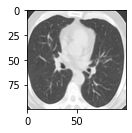

In [71]:
plt.subplot(222).imshow(x_train[0], cmap='gray')

## Normalization

In [72]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [73]:
print (np.max(x_train), np.max(x_test))
print (np.min(x_train), np.min(x_test))

mean = np.mean(x_train)
std  = np.std(x_train)

print(mean)
print(std)

255.0 255.0
0.0 0.0
167.02438
68.25805


In [74]:
x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

print (np.max(x_train),np.max(x_test))
print (np.min(x_train),np.min(x_test))

1.2888681 1.2888681
-2.4469552 -2.4469552


In [75]:
print(x_train[0])

[[[-1.52 -1.52 -1.52]
  [-1.52 -1.52 -1.52]
  [-1.54 -1.54 -1.54]
  ...
  [-1.51 -1.51 -1.51]
  [-1.51 -1.51 -1.51]
  [-1.51 -1.51 -1.51]]

 [[-1.52 -1.52 -1.52]
  [-1.52 -1.52 -1.52]
  [-1.51 -1.51 -1.51]
  ...
  [-1.49 -1.49 -1.49]
  [-1.51 -1.51 -1.51]
  [-1.51 -1.51 -1.51]]

 [[-1.54 -1.54 -1.54]
  [-1.52 -1.52 -1.52]
  [-1.51 -1.51 -1.51]
  ...
  [-1.51 -1.51 -1.51]
  [-1.52 -1.52 -1.52]
  [-1.52 -1.52 -1.52]]

 ...

 [[-1.58 -1.58 -1.58]
  [-0.48 -0.48 -0.48]
  [ 1.03  1.03  1.03]
  ...
  [ 1.03  1.03  1.03]
  [-0.5  -0.5  -0.5 ]
  [-1.67 -1.67 -1.67]]

 [[-1.11 -1.11 -1.11]
  [-1.41 -1.41 -1.41]
  [-0.35 -0.35 -0.35]
  ...
  [-0.67 -0.67 -0.67]
  [-1.63 -1.63 -1.63]
  [-1.47 -1.47 -1.47]]

 [[-1.3  -1.3  -1.3 ]
  [-1.11 -1.11 -1.11]
  [-1.25 -1.25 -1.25]
  ...
  [-1.63 -1.63 -1.63]
  [-1.41 -1.41 -1.41]
  [-1.45 -1.45 -1.45]]]


## Encoding

In [76]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [77]:
print(y_train.shape)
print(y_test.shape)

(1400, 2)
(586, 2)


In [78]:
y_train[695:705]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## Suffle Data

In [79]:
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

## CNN Model

In [80]:
import keras,os
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.applications.vgg16 import VGG16
import numpy as np

In [81]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="sigmoid")) 
##units are 1 because we are using binary activation

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 56, 56, 256)      

In [86]:
# model = keras.applications.VGG16(
#     include_top=True,
#     weights=None,
#     input_tensor=None,
#     input_shape=(100, 100, 1),
#     pooling=None,
#     classes=2,
#     classifier_activation="softmax")

vgg = VGG16(input_shape=(100, 100, 3), weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [87]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)

model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [88]:
import os
os.chdir("/content/drive/My Drive/DL_NITK/Assignment")
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
mc = ModelCheckpoint('covidvgg19.h5', monitor='val_loss', save_best_only=True)
cv = CSVLogger('covidvgg19.csv',append=True)

#early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [97]:
history=model.fit(x_train, y_train, validation_split=(0.2), batch_size=32, callbacks= [mc,cv], epochs=10, verbose=1)

Epoch 1/10
35/35 [==============================] - 134s 4s/step - loss: 0.1943 - accuracy: 0.9464 - val_loss: 0.1953 - val_accuracy: 0.9464
Epoch 2/10
35/35 [==============================] - 133s 4s/step - loss: 0.1695 - accuracy: 0.9571 - val_loss: 0.1757 - val_accuracy: 0.9536
Epoch 3/10
35/35 [==============================] - 132s 4s/step - loss: 0.1517 - accuracy: 0.9616 - val_loss: 0.1883 - val_accuracy: 0.9357
Epoch 4/10
35/35 [==============================] - 132s 4s/step - loss: 0.1485 - accuracy: 0.9625 - val_loss: 0.1584 - val_accuracy: 0.9643
Epoch 5/10
35/35 [==============================] - 132s 4s/step - loss: 0.1305 - accuracy: 0.9714 - val_loss: 0.1685 - val_accuracy: 0.9357
Epoch 6/10
35/35 [==============================] - 132s 4s/step - loss: 0.1177 - accuracy: 0.9804 - val_loss: 0.1517 - val_accuracy: 0.9393
Epoch 7/10
35/35 [==============================] - 132s 4s/step - loss: 0.1057 - accuracy: 0.9821 - val_loss: 0.1427 - val_accuracy: 0.9607
Epoch 8/10
35

## Evaluate

In [98]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)

19/19 [==============================] - 56s 3s/step - loss: 0.9126 - accuracy: 0.6416
0.9126457571983337
0.6416382193565369


## Loss and Accuracy Curves

In [99]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

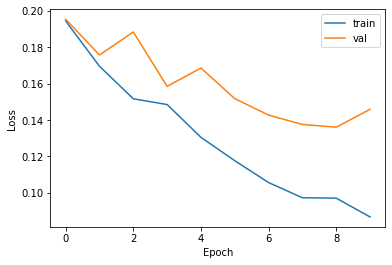

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

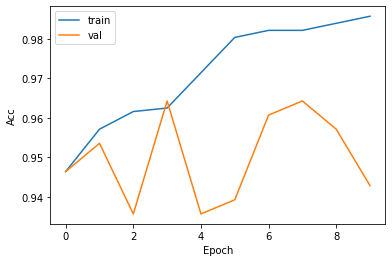

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [102]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['COVID', 'NON COVID']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

       COVID       0.73      0.48      0.58       302
   NON COVID       0.60      0.81      0.69       284

    accuracy                           0.64       586
   macro avg       0.66      0.65      0.63       586
weighted avg       0.66      0.64      0.63       586



In [103]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[146 156]
 [ 54 230]]


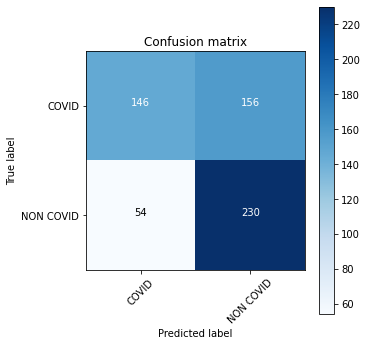

In [104]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(5, 5))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()